In [1]:
using QuadGK
using Plots
# plot()
κ_list = []
theoretical_capacity_list = []
theoretical_capacity_map = Dict()
for κ in 0:0.1:2
    f(t) = 1 / (2π) ^ 0.5 * exp(-t^2 / 2) * (t + κ) ^ 2
    result, error = quadgk(f, -κ, Inf)
    theoretical_capacity = 1 / result
    theoretical_capacity_map[κ] = theoretical_capacity
    println(κ, " ", theoretical_capacity)
    push!(κ_list, κ)
    push!(theoretical_capacity_list, theoretical_capacity)
end
scatter(κ_list, theoretical_capacity_list)
xlabel!("κ")
ylabel!("Capacity")
title!("Theoretical Capacity")
# current()

0.0 1.9999999999999978
0.1 1.7096315002483462
0.2 1.469208396658222
0.3 1.2691324979000715
0.4 1.1018102698349865
0.5 0.9612050528015404
0.6 0.8424951013596045
0.7 0.7418111954267232
0.8 0.6560343664408016
0.9 0.5826392504294011
1.0 0.5195722296049347
1.1 0.4651562175893747
1.2 0.4180159401487588
1.3 0.3770190501958383
1.4 0.34122952786097316
1.5 0.3098706517145121
1.6 0.28229545728983974
1.7 0.2579630762993225
1.8 0.2364197129069225
1.9 0.21728329058888507
2.0 0.20023101560175546


# Parse the result

In [29]:
using Base;
using Statistics;
using DataFrames;
using Plots;
using StatsPlots;
using Random;
using StatsBase;
using JLD;

include("../src/perceptrons.jl")

train_perceptron_stat_steps (generic function with 1 method)

In [28]:
function get_success_rate(all_accuracy_mat)
	sum(all_accuracy_mat[:, end] .> 0.999) / size(all_accuracy_mat, 1)
end

# ╔═╡ 712eae8c-1745-4b0b-8989-7ea460e1133f
function get_learning_epochs(all_accuracy_mat)
	all_index = []
	for i in 1:size(all_accuracy_mat, 2)
		if (all_accuracy_mat[end, i] < 0.999)
			index = -1
		else
			index = findfirst(x -> x > 0.999, all_accuracy_mat[:, i])
		end
		push!(all_index, index)
	end
	return all_index
end
function get_error(all_accuracy_mat)
	1 - mean(all_accuracy_mat[:, end]), std(all_accuracy_mat[:, end])
end


get_error (generic function with 1 method)

In [ ]:

all_records = []
for kappa in [0.0, 0.1, 0.2, 0.3, 0.5]
    dir_path = "../data/kappa_$kappa"
    # List all the files in the directory
    files = readdir(dir_path)
    for file in files
        words = split(file, ['_', '.'])
        # println(words[end - 2], " ", words[end-1])
        num_patterns = parse(Int, words[end-2])
        num_neurons = parse(Int, words[end-1])
        if num_neurons != 1000
            continue
        end
        println(kappa, " ", num_patterns, " ", num_neurons)
        mat = load("$dir_path/$file")["data"].parent
        success_rate = get_success_rate(mat)
        mean_err, std_err = get_error(mat)
        learning_epochs = get_learning_epochs(mat)
        if length(learning_epochs[learning_epochs .> 0]) == 0
            mean_step, std_step = -1, 0
        else
            mean_step, std_step = mean(learning_epochs[learning_epochs .> 0.]), std(learning_epochs[learning_epochs .> 0.])
        end
        record = Dict(
            "kappa" => kappa,
            "num_patterns" => num_patterns,
            "num_neurons" => num_neurons,
            "success_rate" => success_rate,
            "mean_err" => mean_err,
            "std_err" => std_err,
            "mean_step" => mean_step,
            "std_step" => std_step,
        )
        push!(all_records, record)
    end
end

In [ ]:
df = DataFrame(all_records)
sort!(df, :num_patterns, rev=false)
sort!(df, :kappa, rev=false)
df

In [ ]:
# Group the DataFrame by 'kappa'
grouped_df = groupby(df, :kappa)
# Create a separate subgraph for each group
plots = []
p = plot(layout = (length(grouped_df), 1), legend = false)
for (i, group) in enumerate(grouped_df)
    kappa = group.kappa[1]
    num_patterns = group.num_patterns ./ group.num_neurons
    mean_err = group.mean_err
    std_err = group.std_err
    plotnow = plot(num_patterns, mean_err, yerror = std_err, marker = :circle, title = "kappa = $kappa", xlabel = "p/N", ylabel = "Mean Error", label="Mean")
    vline!([theoretical_capacity_map[kappa]], line = :dash, color = :red, label = "Capacity")

    push!(plots, plotnow)
end
plot(plots...)

### Test whether float and binary label makes a difference

In [6]:
margin_binary = load("data\\binary_float\\binary\\margin_0.1_800_500.jld")["data"].parent
size(margin_binary)

LoadError: UndefVarError: `load` not defined

In [5]:
# Example usage
n_samples = 80
n_features = 50
kappa_hack = 0.1
lr_hack = 0.002
max_epochs = 20

p_binary = plot()
X, y = generate_linearly_separable_data(n_samples, n_features, "b-b")
X_binary, y_binary = X, y
perceptron_hack = init_perceptron(n_features)  # Perceptron with n input features
for epochs in 1:max_epochs
    acc = train_perceptron(perceptron_hack, X, y, epochs=1, kappa = kappa_hack, learning_rate=lr_hack)
    println(acc)
    # scatter!(repeat([epochs], n_samples), get_margin(perceptron_hack, X, y), color="black", markersize=1, label = "")
end


Any[0.5]
Any[0.5125]
Any[0.525]
Any[0.5125]
Any[0.525]
Any[0.5375]
Any[0.525]
Any[0.5375]
Any[0.5375]
Any[0.55]
Any[0.5375]
Any[0.55]
Any[0.5375]
Any[0.55]
Any[0.575]
Any[0.5875]
Any[0.6]
Any[0.6125]
Any[0.5875]
Any[0.5875]


In [ ]:
# Example usage
n_samples = 80
n_features = 50
kappa_hack = 0.1
lr_hack = 0.002
max_epochs = 2000

p_binary = plot()
X, y = generate_linearly_separable_data(n_samples, n_features, "b-b")
X_binary, y_binary = X, y
perceptron_hack = init_perceptron(n_features)  # Perceptron with n input features
for epochs in 1:max_epochs
    acc = train_perceptron(perceptron_hack, X, y, epochs=1, kappa = kappa_hack, learning_rate=lr_hack)
    scatter!(repeat([epochs], n_samples), get_margin(perceptron_hack, X, y), color="black", markersize=1, label = "")
end
xlabel!("#Epoch")
ylabel!("Margin")
hline!([kappa_hack],  line=:dash, color=:red, linewidth=2, label="")
title!("Binary Label")

p_float = plot()
X, y = generate_linearly_separable_data(n_samples, n_features, "f-b")
X_float, y_float = X, y
perceptron_hack = init_perceptron(n_features)  # Perceptron with n input features
for epochs in 1:max_epochs
    acc = train_perceptron(perceptron_hack, X, y, epochs=1, kappa = kappa_hack, learning_rate=lr_hack)
    scatter!(repeat([epochs], n_samples), get_margin(perceptron_hack, X, y), color="black", markersize=1, label = "")
end
xlabel!("#Epoch")
ylabel!("Margin")
hline!([kappa_hack],  line=:dash, color=:red, linewidth=2, label="")
title!("Float Label")

plot(p_binary, p_float, layout=(1, 2))

In [ ]:
cor_matrix = cor(X_binary)


# Compare float and binary

┌ Warning: type LinearAlgebra.Adjoint{Core.Float64,Core.Array{Core.Float64,2}} not present in workspace; reconstructing
└ @ JLD C:\Users\bjmiao\.julia\packages\JLD\GHujm\src\jld_types.jl:697


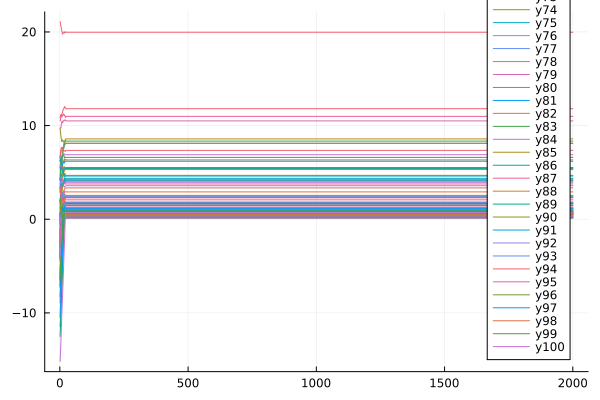

In [26]:
margin_binary = load("..\\data\\binary_float\\float\\margin_0.1_100_500.jld")["data"].parent
p = plot()
for i in 1:100
    plot!(margin_binary[i, 1:2000])
end
display(p)

In [34]:
n_samples = 18
n_features = 10
Random.seed!(42)
X, y = generate_linearly_separable_data(n_samples, n_features)
println(size(X))
println(X[7, :])
println(X[14, :])
println(X[18, :])

(18, 10)
[1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0]
[-1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0]
[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0]
